# Deliverable 2: Data-Preprocessing

## Robert, Dave and Stan
--------------------------------------------------------------------------------------------------------------------------------


### We hope to predict the winner of the 2018 NBA Playoffs 
### Collected data from 

  1. https://www.cbssports.com/nba/standings 
      * This website was found using a google search. We scraped the end of season statistics to help give us viable features for our model.
  2. https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1&Season=2017-18&SeasonType=Regular%20Season 
      * This website was found with a google search. We used sweat equity to uncover more final season statistics for playoff teams "for" and "against". This will help us when training our model with the playoff teams.

Question: Can we use machine learning, with statistics from the regular season and past playoff performances, to predict the outcome of the NBA playoffs? We want to investigate if we can successfully have a model that identifies key features in a winning team and then can predict future winners. The plan is to have the model train on statistics from previous seasons and associate those with the teams that won, and then run the statistics from this past season to see who will win the 2018 playoffs. 

In this deliverable, we gathered more data and preprocessed all of our data further to prepare it to be fed into a machine learning model in the next deliverable. Below are some of our visualizations of our data. The preprocessing steps can be found in "Preprocessing.ipynb" and "Series_Preprocess.ipynb". The final CSVs for the model can be found in the direcorty "./preprocessed/final/".

In [1]:
# Import necessary libraries 

import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy as sc
from scipy.stats import ttest_ind
import math

In [2]:
# Read necessary csv's of stats for top 16 teams and stats against top 16 teams
#     Also sort teams by ranking at end of the season, so teams go from left to right in graphs by ranking

stats_against_1314 = pd.read_csv("./preprocessed/opp_stats1314.csv", sep = ',')
stats_against_1415 = pd.read_csv("./preprocessed/opp_stats1415.csv", sep = ',')
stats_against_1516 = pd.read_csv("./preprocessed/opp_stats1516.csv", sep = ',')
stats_against_1617 = pd.read_csv("./preprocessed/opp_stats1617.csv", sep = ',')
stats_against_1718 = pd.read_csv("./preprocessed/opp_stats1718.csv", sep = ',')

stats_for_1314 = pd.read_csv("./preprocessed/team_stats1314.csv", sep = ',')
stats_for_1415 = pd.read_csv("./preprocessed/team_stats1415.csv", sep = ',')
stats_for_1516 = pd.read_csv("./preprocessed/team_stats1516.csv", sep = ',')
stats_for_1617 = pd.read_csv("./preprocessed/team_stats1617.csv", sep = ',')
stats_for_1718 = pd.read_csv("./preprocessed/team_stats1718.csv", sep = ',')

stats_for_1314.sort_values(by = ['Rk'])
stats_for_1415.sort_values(by = ['Rk'])
stats_for_1516.sort_values(by = ['Rk'])
stats_for_1617.sort_values(by = ['Rk'])
stats_for_1718.sort_values(by = ['Rk'])

stats_for_1516.head()

,Unnamed: 0,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,WIN%
0,0,1,Golden State Warriors*,82,242.4,42.5,87.3,0.487,13.1,31.6,...,10.0,36.2,46.2,28.9,8.4,6.1,15.2,20.7,114.9,89.0
1,1,5,Oklahoma City Thunder*,82,241.8,41.1,86.4,0.476,8.3,23.7,...,13.1,35.6,48.6,23.0,7.4,5.9,15.9,20.6,110.2,67.1
2,2,17,Houston Rockets*,82,241.8,37.7,83.5,0.452,10.7,30.9,...,11.3,31.7,43.1,22.2,10.0,5.2,15.9,21.8,106.5,50.0
3,3,7,Boston Celtics*,82,241.2,39.2,89.2,0.439,8.7,26.1,...,11.6,33.3,44.9,24.2,9.2,4.2,13.7,21.9,105.7,58.5
4,4,12,Portland Trail Blazers*,82,241.5,38.6,85.9,0.450,10.5,28.5,...,11.6,33.9,45.5,21.3,6.9,4.6,14.6,21.7,105.1,53.7


In [3]:
# Cut down dataframe columns in order to see correlations between significant statistics with win %

stats_for_1314_corr = stats_for_1314[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]
stats_for_1516_corr = stats_for_1516[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]
stats_for_1617_corr = stats_for_1617[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]
stats_for_1718_corr = stats_for_1718[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]


stats_for_1415_corr = stats_for_1415[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]
stats_for_1415_corr.corr().tail(1)

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,WIN%
WIN%,0.472978,0.054229,0.572437,0.627015,0.477123,0.688882,-0.309409,-0.481912,0.649455,-0.350964,0.270662,0.038957,0.518273,0.37734,0.381006,-0.049746,-0.229414,0.730259,1.0


In [4]:
# Multiplies all percents by 100 for plotting
def make_perc(year):
    year['3P%'] = year['3P%'] * 100
    year['2P%'] = year['2P%'] * 100
    year['FG%'] = year['FG%'] * 100
    return year

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

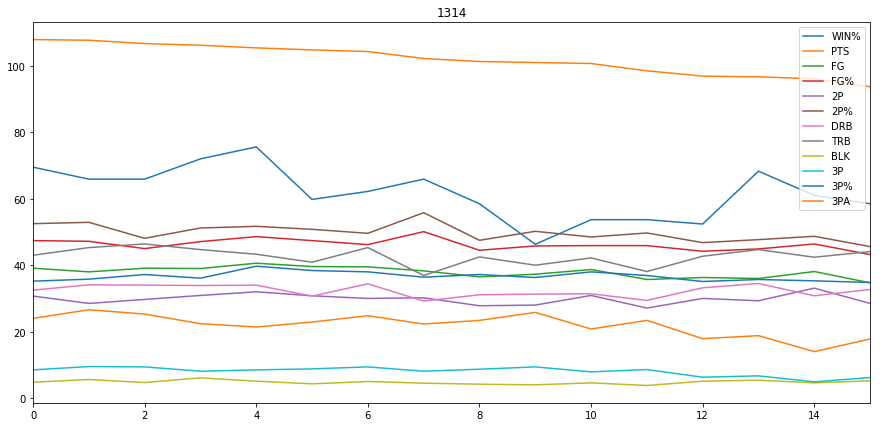

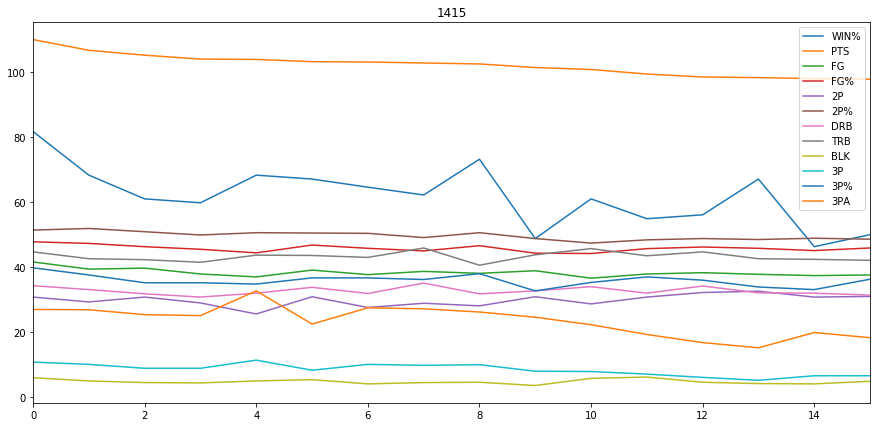

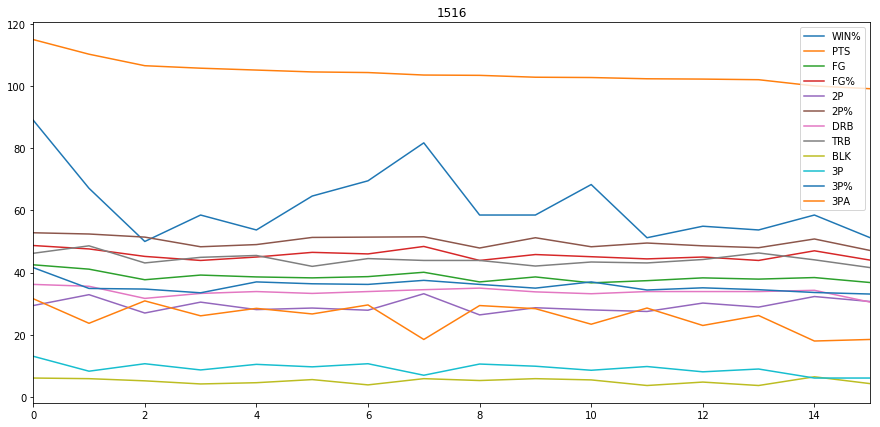

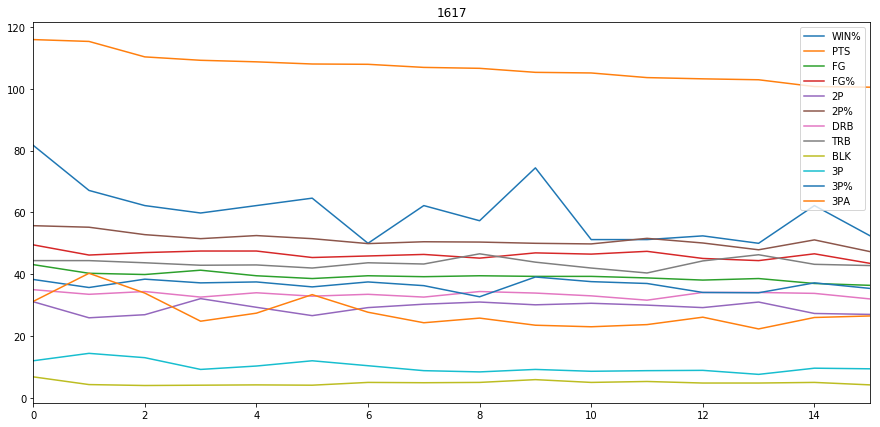

In [5]:
# Take the most correlated statistics with winning percentage in order to graph them and visualize trends
stats_for_1314_sign = stats_for_1314[['Team', 'WIN%', 'PTS', 'FG', 'FG%', '2P', '2P%', 'DRB', 'TRB', 'BLK', '3P', '3P%', '3PA']]
stats_for_1415_sign = stats_for_1415[['Team', 'WIN%', 'PTS', 'FG', 'FG%', '2P', '2P%', 'DRB', 'TRB', 'BLK', '3P', '3P%', '3PA']]
stats_for_1516_sign = stats_for_1516[['Team', 'WIN%', 'PTS', 'FG', 'FG%', '2P', '2P%', 'DRB', 'TRB', 'BLK', '3P', '3P%', '3PA']]
stats_for_1617_sign = stats_for_1617[['Team', 'WIN%', 'PTS', 'FG', 'FG%', '2P', '2P%', 'DRB', 'TRB', 'BLK', '3P', '3P%', '3PA']]

years = [stats_for_1314_sign, stats_for_1415_sign, stats_for_1516_sign, stats_for_1617_sign]

for year in years:
    year = make_perc(year)

stats_for_1314_sign.plot(title = '1314', figsize = (15, 7))
stats_for_1415_sign.plot(title = '1415', figsize = (15, 7))
stats_for_1516_sign.plot(title = '1516', figsize = (15, 7))
stats_for_1617_sign.plot(title = '1617', figsize = (15, 7))

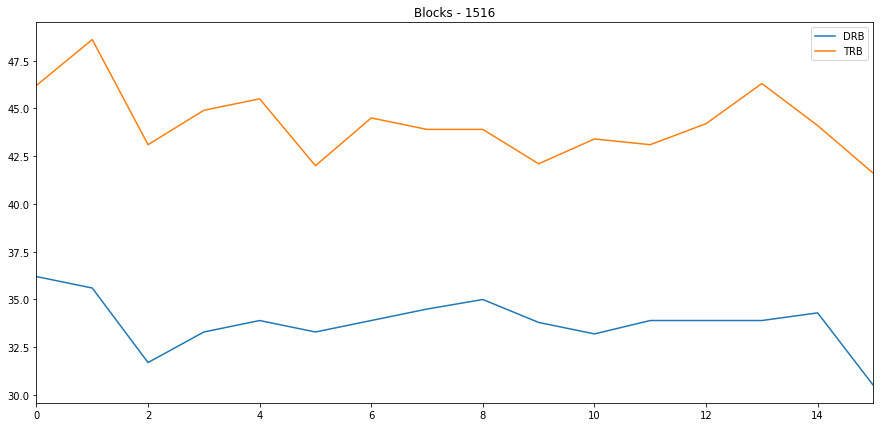

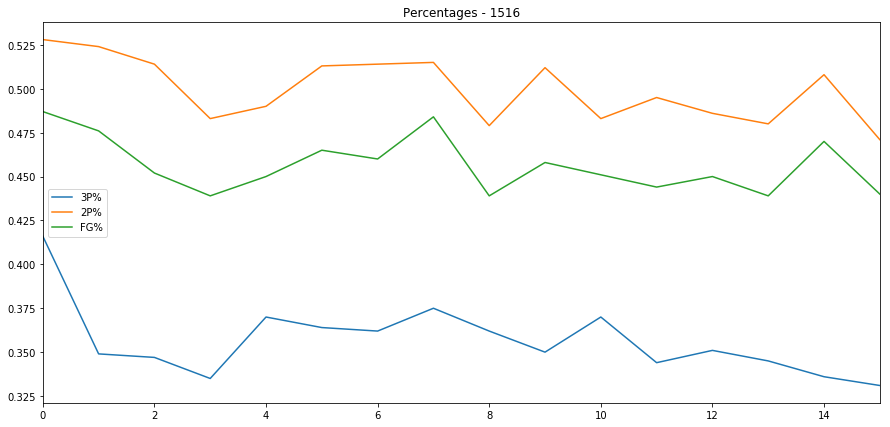

In [6]:
# In order to better visualize

stats_for_1516_blocks = stats_for_1516[['Team','DRB', 'TRB']]
stats_for_1516_perc = stats_for_1516[['Team','3P%', '2P%', 'FG%']]
stats_for_1516_blocks.plot(title = 'Blocks - 1516', figsize = (15, 7))
stats_for_1516_perc.plot(title = 'Percentages - 1516', figsize = (15,7))

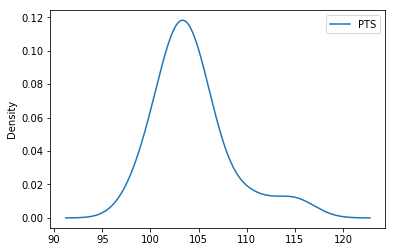

In [7]:
# A chart representing the distribution of average points per game 

stats_for_1516_pts = stats_for_1516[['Team', 'PTS']]
stats_for_1516_pts.plot(kind = 'density')

In [8]:
# A normal test done on the average points scored per game 

sc.stats.normaltest(stats_for_1516_pts['PTS'])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=11.144367031956026, pvalue=0.0038021692647695602)

In [9]:
# Visualizing that a log of these values doesn't provide a better normalization of the data

normalized = np.log(stats_for_1516_pts['PTS'])
stats_for_1516_pts['PTS'] = normalized
sc.stats.normaltest(stats_for_1516_pts['PTS'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=9.7951909868757028, pvalue=0.00746450997282333)

In [10]:
# A pearson correlation completed between three point shot percentage and end of season winning percentage.

sc.stats.pearsonr(stats_for_1415_sign['3P%'], stats_for_1415_sign['WIN%'])

(0.68888226969960153, 0.0031637759226159985)

In [11]:
# Again with two point shot percentage and winning percentage

sc.stats.pearsonr(stats_for_1415_sign['2P%'], stats_for_1415_sign['WIN%'])

(0.649455078090175, 0.0064752041497492373)

In [12]:
# Now the correlation between total rebounds and winning percentage: note that the correlation is small

sc.stats.pearsonr(stats_for_1415_sign['TRB'], stats_for_1415_sign['WIN%'])

(0.038957353317067699, 0.88609898750392113)

In [13]:
# A more highly correlation between total points per game and winning percentage

sc.stats.pearsonr(stats_for_1415_sign['PTS'], stats_for_1415_sign['WIN%'])

(0.7302594976875687, 0.0013171777509547937)

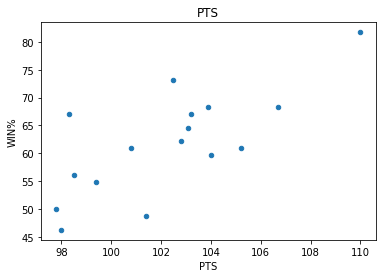

In [28]:
# A scatter plot of average points scored and win percentage 

rebounds['PTS'] = stats_for_1415_sign['PTS']
rebounds['WIN%'] = stats_for_1415_sign['WIN%']
rebounds.plot(title = 'PTS', x = 'PTS' , y = 'WIN%', kind = 'scatter')

In [29]:
# Here I collect the win percentage series for each year.

win_perc_1314 = stats_for_1314_corr.corr()['WIN%']
win_perc_1415 = stats_for_1415_corr.corr()['WIN%']
win_perc_1516 = stats_for_1516_corr.corr()['WIN%']
win_perc_1617 = stats_for_1617_corr.corr()['WIN%']
win_perc_1718 = stats_for_1718_corr.corr()['WIN%']

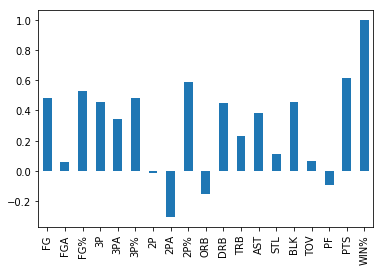

In [30]:
# Calculating the average correlations between the years and plot

avg_correlations = (win_perc_1314 + win_perc_1415 + win_perc_1516 + win_perc_1617 + win_perc_1718)/5
avg_correlations.plot(kind = 'bar')